# External Lab 

Here each question is of 1 mark.

# Multiple Linear Regression

## Problem Statement

Use Multiple Linear Regression to **predict the consumption of petrol** given relevant variables are the petrol tax, the per capita, income, the number of miles of paved highway, and the proportion of the population with driver's licenses.

## Dataset

There are 48 rows of data.  The data include:

      I,  the index;
      A1, the petrol tax;
      A2, the per capita income;
      A3, the number of miles of paved highway;
      A4, the proportion of drivers;
      B,  the consumption of petrol.

### Reference 

    Helmut Spaeth,
    Mathematical Algorithms for Linear Regression,
    Academic Press, 1991,
    ISBN 0-12-656460-4.

    S Weisberg,
    Applied Linear Regression,
    New York, 1980, pages 32-33.

## Question 1 - Exploratory Data Analysis

*Read the dataset given in file named **'petrol.csv'**. Check the statistical details of the dataset.*

**Hint:** You can use **df.describe()**

In [156]:
import pandas as pd
import numpy       as np
import scipy.stats as stats
from    scipy.stats             import  ttest_1samp,ttest_ind, wilcoxon, ttest_ind_from_stats
import  scipy.stats             as      stats  
from    statsmodels.stats.power import  ttest_power
import  matplotlib.pyplot       as      plt
import os
df = pd.read_csv(os.getcwd() + '/Petrol.csv')
df.describe()

,tax,income,highway,dl,consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


# Question 2 - Cap outliers 

Find the outliers and cap them. (Use (Q1 - 1.5 * IQR) as the minimum cap and (Q3 + 1.5 * IQR) as the max cap. The decision criteria is you should consider the datapoints which only falls within this range. The data points which fall outside this range are outliers and the entire row needs to be removed

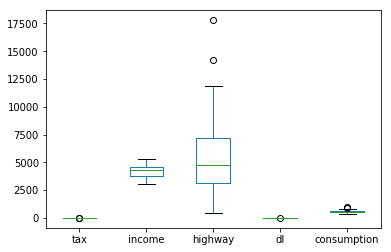

In [154]:
%matplotlib inline

df.plot(kind='box')


In [164]:
q1, q3= np.percentile(df,[25,75])
iqr = q3 - q1
print(iqr)
lower_bound = q1 -(1.5 * iqr) 
print(lower_bound)
upper_bound = q3 +(1.5 * iqr)
print(upper_bound)
df = df.loc[df['highway'] < upper_bound]
df

4047.5
-6064.25
10125.75


,tax,income,highway,dl,consumption
0,9.00,3571,1976,0.525,541
1,9.00,4092,1250,0.572,524
2,9.00,3865,1586,0.580,561
3,7.50,4870,2351,0.529,414
4,8.00,4399,431,0.544,410
5,10.00,5342,1333,0.571,457
7,8.00,5126,2138,0.553,467
8,8.00,4447,8577,0.529,464
9,7.00,4512,8507,0.552,498
10,8.00,4391,5939,0.530,580


# Question 3 - Independent variables and collinearity 
Which attributes seems to have stronger association with the dependent variable consumption?

In [165]:
df.columns

Index(['tax', 'income', 'highway', 'dl', 'consumption'], dtype='object')

In [169]:
print("association of tax & consumtion" ,  df['tax'].corr(df['consumption']))
print("association of income & consumtion" ,  df['income'].corr(df['consumption']))
print("association of highway & consumtion" ,  df['highway'].corr(df['consumption']))
print("association of dl & consumtion" ,  df['dl'].corr(df['consumption']))

association of tax & consumtion -0.47549761589696615
association of income & consumtion -0.1436730626908344
association of highway & consumtion 0.15756459753618932
association of dl & consumtion 0.6633484387513291


### Observing the above correlation values between all the variables, we can see that there is stronger association between the number of drivers and consumption. And comparatively tax has an association in a negative way. 
Insights :
As tax increases the consumption decreases.
As number of drivers is more consumption is more

# Question 4 - Transform the dataset 
Divide the data into feature(X) and target(Y) sets.

In [170]:
df.shape

(44, 5)

# Question 5 - Split data into train, test sets 
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.

In [171]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, df, test_size=0.20, random_state=1)

# Question 6 - Build Model 
Estimate the coefficients for each input feature. Construct and display a dataframe with coefficients and X.columns as columns

In [172]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
print(df.columns)
data = {'column':['tax', ' income', ' highway', ' dl', ' consumption'], 
        'coefficients':[regression_model.coef_[0], regression_model.coef_[1], regression_model.coef_[2]
                        , regression_model.coef_[3], regression_model.coef_[4]]} 
pd.DataFrame(data)

Index(['tax', 'income', 'highway', 'dl', 'consumption'], dtype='object')


,column,coefficients
0,tax,"[1.0000000000000007, 1.286445018745347e-17, -1..."
1,income,"[-1.2255641001536574e-13, 1.0000000000000009, ..."
2,highway,"[-3.8087146572481466e-14, 9.401232514056478e-1..."
3,dl,"[2.6709297190940448e-14, 1.8143951271934168e-1..."
4,consumption,"[-2.631489115698818e-14, 2.8782095908851706e-1..."


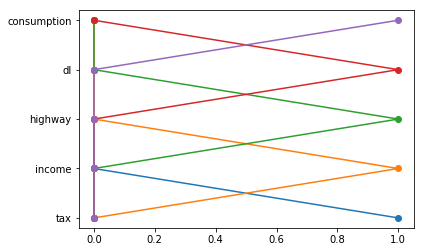

In [173]:
import matplotlib.pyplot as plt
x = regression_model.coef_;
y = df.columns
plt.plot(x, y, 'o-')

# R-Square 

# Question 7 - Evaluate the model 
Calculate the accuracy score for the above model.

In [174]:
regression_model.score(X_test, y_test)

1.0

In [175]:
regression_model.score(X_train, y_train)

1.0

# Question 8: Repeat the same Multi linear regression modelling by adding both Income and Highway features
Find R2 


In [176]:
y_pred = regression_model.predict(df)
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

mse = mean_squared_error(df, y_pred)
print(mse)
rmse = sqrt(mse)
print("R2 ->",rmse)

3.285358774710837e-25
R2 -> 5.73180492926167e-13


# Question 9: Print the coefficients of the multilinear regression model

In [177]:
print("the coefficient for 0", regression_model.coef_[0])
print("the coefficient for 1", regression_model.coef_[1])
print("the coefficient for 2", regression_model.coef_[2])
print("the coefficient for 3", regression_model.coef_[3])
print("the coefficient for 4", regression_model.coef_[4])

the coefficient for 0 [ 1.00000000e+00  1.28644502e-17 -1.02033765e-17  1.01523422e-15
  1.94075366e-15]
the coefficient for 1 [-1.22556410e-13  1.00000000e+00 -1.32941288e-16  3.08247030e-13
 -8.15738463e-16]
the coefficient for 2 [-3.80871466e-14  9.40123251e-17  1.00000000e+00  1.60664722e-12
 -5.98035205e-16]
the coefficient for 3 [2.67092972e-14 1.81439513e-16 7.93218923e-18 1.00000000e+00
 3.11113198e-16]
the coefficient for 4 [-2.63148912e-14  2.87820959e-16 -5.62529924e-18  4.06223942e-13
  1.00000000e+00]


# Question 10 
In one or two sentences give reasoning on R-Square on the basis of above findings
Answer

root mean square is a standard deviation of the prediction errors. It measures how far is the point from best fit line. from the above rmse value of 5.73, it says there are outliers because of which the best fit line may shift towards outliers and may not give the correct visualization about the dataframe, as rmse=5 is high in calcualtion.